In [1]:
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/Hide code</button>''', raw=True)

Show/Hide code

In [2]:
#Allow the created content to be interactivelly ploted inline
%matplotlib inline
#Establish width and height for all plots in the report
#pylab.rcParams['figure.figsize'] = (18, 6) #width, height

In [3]:
#Import needed libraries
import os
from os.path import join, getsize
import pandas as pd
from cycler import cycler
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import collections
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
#the next cell enables plotting tables without borders

In [4]:
%%html
<style>
table,td,tr,th {border:none!important}
</style>

![](http://i.imgur.com/6WjKKHH.png)

# Summary report of the CO2MPAS WLTP to NEDC CO$_2$ emission simulation model

[Visit the CO2MPAS home page](http://co2mpas.io)

In [5]:
#Specify the output folder and file containing the CO2MPAS summary output file.
folder = r'D:\LAT\Sprinter\co2mpas_outs'
file = '20160607_105545-summary.xlsx'
infile = join(folder, file)
df=pd.read_excel(infile, 'summary', header=[0, 1, 2], index_col=[0], skiprows=[3])

In [6]:
#Gather and name the basic variables used in the report according to their name in the CO2MPAS output file
NEDC = df['nedc']['prediction']['co2_emission value']
NEDCt = df['nedc']['target']['co2_emission value']
UDC = df['nedc']['prediction']['co2_emission UDC']
UDCt = df['nedc']['target']['co2_emission UDC']
EUDC = df['nedc']['prediction']['co2_emission EUDC']
EUDCt = df['nedc']['target']['co2_emission EUDC']
#Obtain the case number and vehicle model from the input file
df['vehicle'] = df.index
cases = df['vehicle'].str.split('_').str[-1].astype('int')
model = df['vehicle'].str.split('_').str[0]
#Create a dataframe with this data
valuesDF = pd.DataFrame({'NEDC': NEDC,'NEDCt':NEDCt, 'dNEDC':NEDC-NEDCt,'UDC': UDC,'UDCt':UDCt, 'dUDC':UDC-UDCt,'EUDC': EUDC,'EUDCt':EUDCt, 'dEUDC':EUDC-EUDCt,'Case':cases,'Model':model})   
valuesDF = valuesDF.dropna()

## Section 1. Performance of the model. All vehicles and test cases.

### Error statistics for CO$_2$ emission per driving cycle

Error statistics for **NEDC**, **UDC**, and **EUDC** CO$_2$ emission

In [7]:
#Create a dataframe with the NECD, UDC, EUDC error statistics
errorsDF = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
errorsDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mean(),2)})
errorsDF.loc['StdError'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sem(),2)})
errorsDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.median(),2)})
errorsDF.loc['Mode'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mode().iloc[0],2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mode().iloc[0],2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mode().iloc[0],2)})
errorsDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.std(),2)})
errorsDF.loc['Variance'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.var(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.var(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.var(),2)})
errorsDF.loc['Kurtosis'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.kurtosis(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.kurtosis(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.kurtosis(),2)})
errorsDF.loc['Skweness'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.skew(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.skew(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.skew(),2)})
errorsDF.loc['Range'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dNEDC.max()-valuesDF.dNEDC.min()),2), 'UDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dUDC.max()-valuesDF.dUDC.min()),2), 'EUDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dEUDC.max()-valuesDF.dEUDC.min()),2)})
errorsDF.loc['Minimum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.min(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.min(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.min(),2)})
errorsDF.loc['Maximum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.max(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.max(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.max(),2)})
errorsDF.loc['Sum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sum(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sum(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sum(),2)})
errorsDF.loc['Count'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.count(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.count(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.count(),2)})
errorsDF.loc['Confidence level (95%)'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dEUDC.sem(),2)})
errorsDF

,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,4.98,11.53,1.22
StdError,0.17,0.35,0.16
Median,4.79,10.65,1.11
Mode,5.64,11.84,2.07
StdDev,2.11,4.41,2.05
Variance,4.47,19.43,4.18
Kurtosis,0.36,1.14,-0.09
Skweness,0.3,0.93,0.09
Range,11.87,24.07,9.76
Minimum,-0.7,0.6,-3.42


Distribution of the **NEDC**, **UDC** and **EUDC** errors 

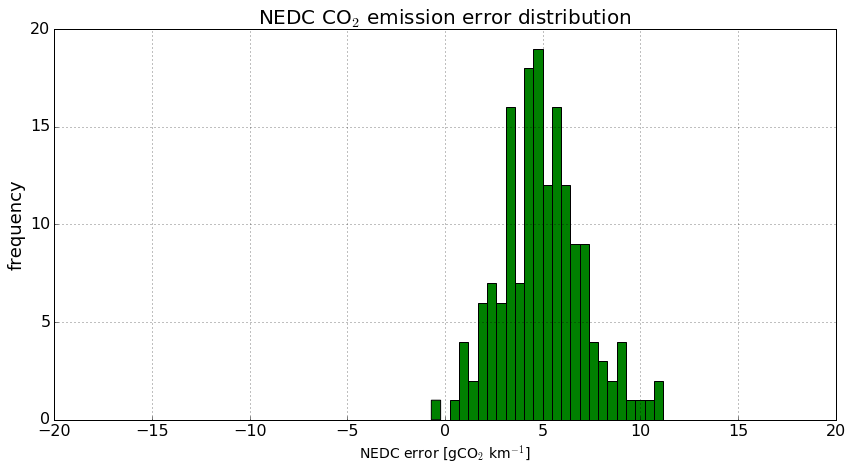

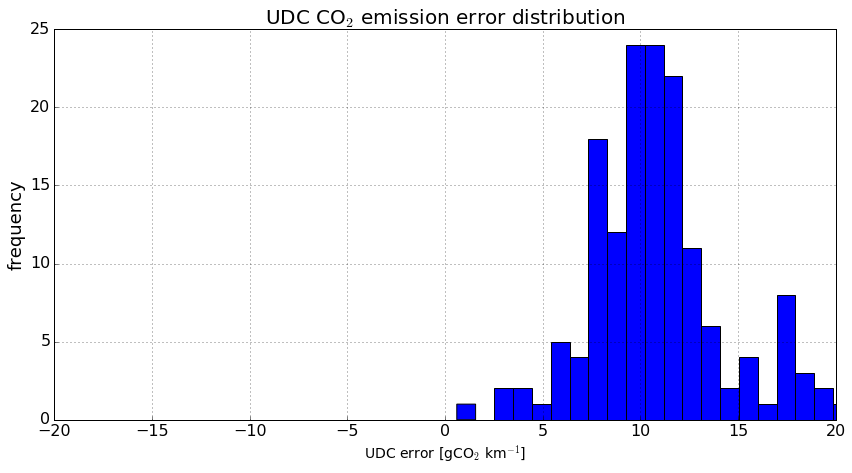

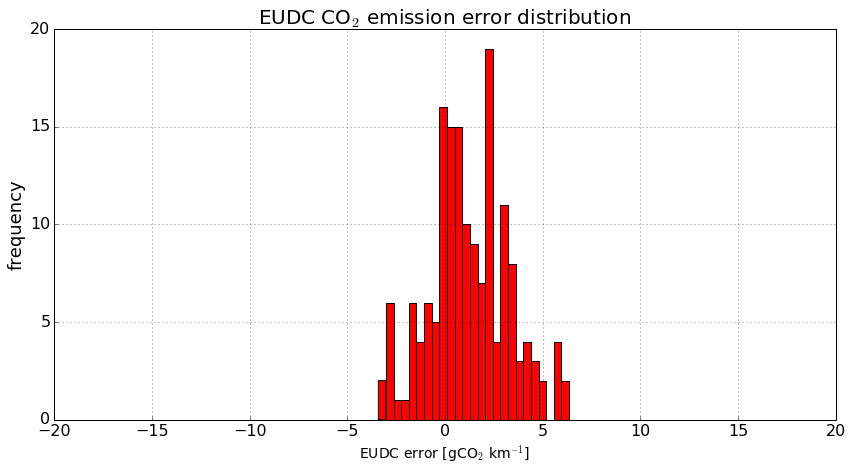

In [8]:
mydict = ([('NEDC', 0), ('UDC', 1), ('EUDC', 2)])
mydict = collections.OrderedDict(mydict)
for cycle in mydict:
    if cycle == 'NEDC':
        boxcolor = 'green'
    elif cycle == 'UDC':
        boxcolor = 'blue'
    else:
        boxcolor = 'red'
    # Create a figure instance
    fig = plt.figure(1, figsize=(14, 7))
    # Create an axes instance
    ax = fig.add_subplot(111)
    hist = valuesDF['d'+cycle].hist(bins=25, color=boxcolor)
    hist.set_xlabel(cycle+" error [gCO$_2$ km$^{-1}$]",fontsize=14)
    hist.set_ylabel("frequency",fontsize=14)
    plt.title(cycle+' CO$_2$ emission error distribution', fontsize=20)
    plt.ylabel("frequency",fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlim(-20, 20)
    plt.show()

Comparative emission error per driving cycle (gCO$_2$ km$^{-1}$)

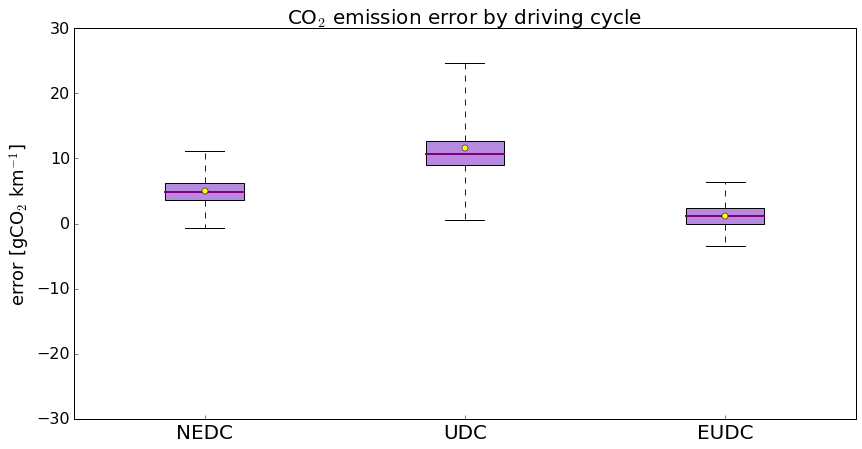

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [9]:
#Alternatively show boxplots
toboxplot = [valuesDF.dNEDC,valuesDF.dUDC,valuesDF.dEUDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(toboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
    ## Custom x-axis labels
ax.set_xticklabels(['NEDC', 'UDC', 'EUDC'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('CO$_2$ emission error by driving cycle', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-30, 30)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

### Error statistics per technology type

In [10]:
#Print a dictionary with the tested technologies and their identification codes
tec = pd.DataFrame(index=['Base case','Gear configuration A','Gear configuration B','No Start/Stop','No Break energy recuperation','Variable valve lifting','Direct injection/Multipoint injection','Lean burn','Thermal management'])
tec['Technology code'] = ['BC','GCA','GCB','NOSS','NOBERS','VVL','DI/MPI','LB','ThM']
tec.columns.name='Technology type'
tec

Technology type,Technology code
Base case,BC
Gear configuration A,GCA
Gear configuration B,GCB
No Start/Stop,NOSS
No Break energy recuperation,NOBERS
Variable valve lifting,VVL
Direct injection/Multipoint injection,DI/MPI
Lean burn,LB
Thermal management,ThM


In [11]:
#Function that assigns the number of case to the specific technology tested for each vehicle model
def assign_technol_perCarAndCase(df):
    #looks for the case # in the input file and assigns a technology
    df_basecase = df[valuesDF['Case'] <= 27]
    df_gca = df[(valuesDF['Case'] > 27) & (valuesDF['Case'] <= 54)]
    df_gcb = df[(valuesDF['Case'] > 54) & (valuesDF['Case'] <= 81)]
    df_noss = df[(valuesDF['Case'] > 81) & (valuesDF['Case'] <= 108)]
    df_nobers = df[(valuesDF['Case'] > 108) & (valuesDF['Case'] <= 135)]
#    df_vvl = df[(valuesDF['Case'] > 135) & (valuesDF['Case'] <= 162)]
#    df_dimpi = df[(valuesDF['Case'] > 162) & (valuesDF['Case'] <= 189)]
    #CHECK the BATCH FILE to CONFIRM the CASE SELECTION
#    df_lb = df[(valuesDF['Case'] > 189) & (valuesDF['Case'] <= 216)]
    df_tm = df[(valuesDF['Case'] > 135) & (valuesDF['Case'] <= 245)]
    #Append to the original DF a column with the technology IDcode
    pd.options.mode.chained_assignment = None  # default='warn'
    try:
        df_basecase.loc[:,'Tecno'] = 'BC'
    except:
        pass
    try:
        df_gca.loc[:,'Tecno'] = 'GCA'
    except:
        pass
    try:
        df_gcb.loc[:,'Tecno'] = 'GCB'
    except:
        pass
    try:
        df_noss.loc[:,'Tecno'] = 'NOSS'
    except:
        pass
    try:
        df_nobers.loc[:,'Tecno'] = 'NOBERS'
    except:
        pass
    try:
        df_vvl.loc[:,'Tecno'] = 'VVL'
    except:
        pass
    try:
        df_dimpi.loc[:,'Tecno'] = 'DI/MPI'
    except:
        pass
    try:
        df_lb.loc[:,'Tecno'] = 'LB'
    except:
        pass
    try:
        df_tm.loc[:,'Tecno'] = 'ThM'
    except:
        pass
    bigdata = pd.concat([df_basecase,df_gca,df_gcb,df_noss,df_nobers,df_tm], ignore_index=False)
#     bigdata = pd.concat([df_basecase,df_gca,df_gcb,df_noss,df_nobers,df_vvl,df_dimpi,df_lb,df_tm], ignore_index=False)
    return bigdata

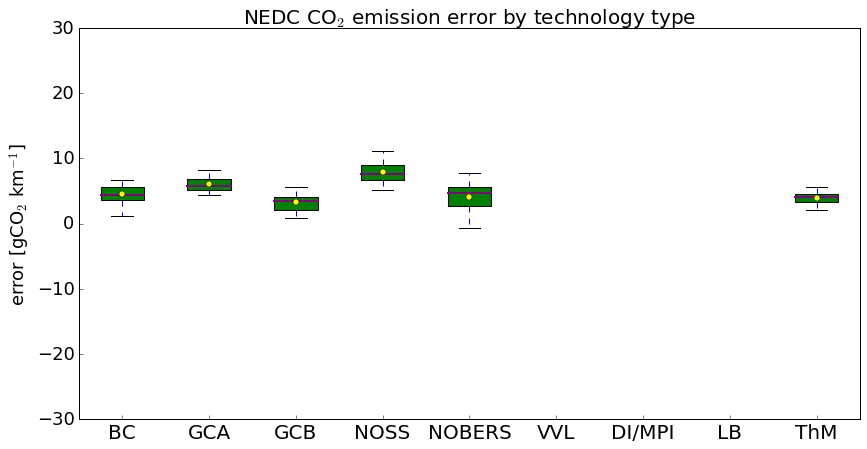

The green box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.

Descriptive statistics for NEDC CO2 emission error per technology type


NEDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,LB,ThM
Averages,4.55,6.05,3.34,7.91,4.14,NaN,NaN,NaN,3.91
StdError,0.25,0.21,0.26,0.31,0.42,NaN,NaN,NaN,0.17
Median,4.37,5.76,3.48,7.65,4.66,NaN,NaN,NaN,4.07
StdDev,1.31,1.1,1.35,1.61,2.16,NaN,NaN,NaN,0.9
Variance,1.71,1.21,1.82,2.58,4.67,NaN,NaN,NaN,0.81
Kurtosis,0.21,-1.08,-0.77,-0.7,-0.31,NaN,NaN,NaN,-0.58
Skweness,-0.45,0.3,0.11,0.42,-0.59,NaN,NaN,NaN,-0.09
Range,5.58,3.83,4.7,6.07,8.5,NaN,NaN,NaN,3.54
Minimum,1.09,4.36,0.9,5.09,-0.7,NaN,NaN,NaN,2.12
Maximum,6.68,8.2,5.6,11.17,7.8,NaN,NaN,NaN,5.66


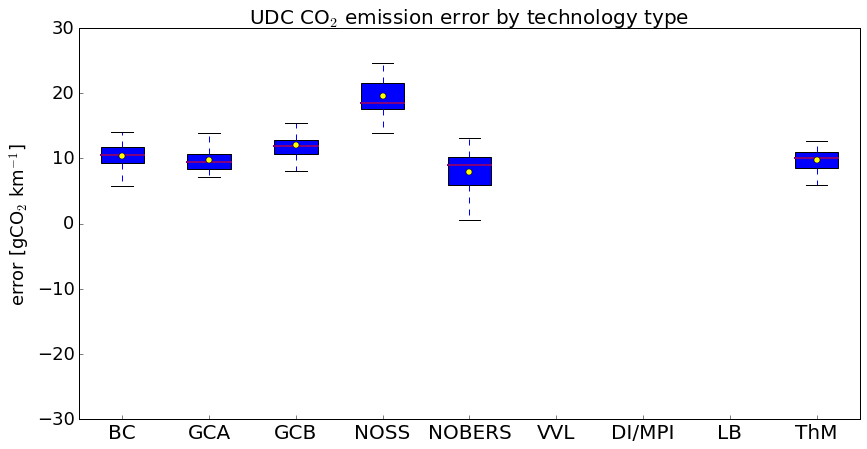

The green box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.

Descriptive statistics for UDC CO2 emission error per technology type


UDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,LB,ThM
Averages,10.36,9.69,12,19.52,7.95,NaN,NaN,NaN,9.72
StdError,0.36,0.34,0.39,0.55,0.63,NaN,NaN,NaN,0.34
Median,10.58,9.46,11.88,18.57,8.96,NaN,NaN,NaN,10.05
StdDev,1.92,1.74,2,2.84,3.27,NaN,NaN,NaN,1.78
Variance,3.69,3.04,4.01,8.09,10.68,NaN,NaN,NaN,3.18
Kurtosis,-0.11,-0.22,-0.4,-0.69,-0.45,NaN,NaN,NaN,-0.56
Skweness,-0.33,0.59,0.03,0.3,-0.6,NaN,NaN,NaN,-0.38
Range,12.89,9.55,14.55,19.58,13.86,NaN,NaN,NaN,10.61
Minimum,5.76,7.12,8.12,13.92,0.6,NaN,NaN,NaN,5.91
Maximum,13.98,13.92,15.45,24.68,13.16,NaN,NaN,NaN,12.73


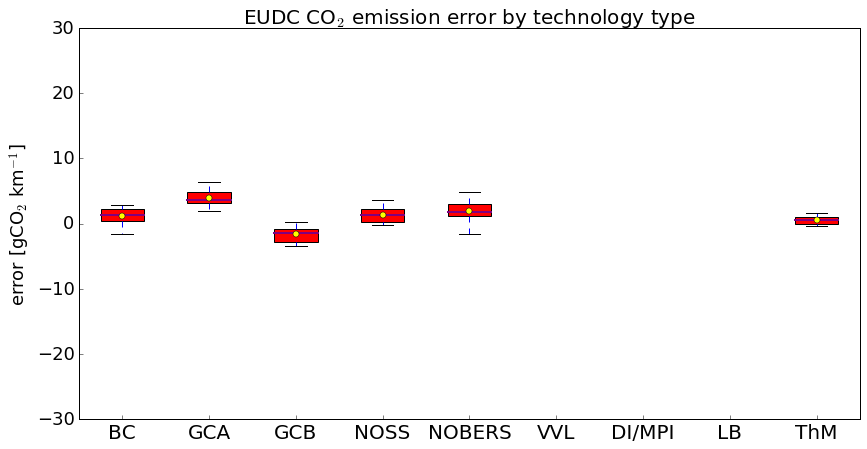

The green box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.

Descriptive statistics for EUDC CO2 emission error per technology type


EUDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,LB,ThM
Averages,1.21,3.96,-1.64,1.28,1.95,NaN,NaN,NaN,0.56
StdError,0.22,0.24,0.21,0.23,0.33,NaN,NaN,NaN,0.11
Median,1.34,3.62,-1.49,1.33,1.83,NaN,NaN,NaN,0.61
StdDev,1.14,1.26,1.09,1.18,1.7,NaN,NaN,NaN,0.58
Variance,1.3,1.59,1.19,1.4,2.9,NaN,NaN,NaN,0.33
Kurtosis,-0.16,-0.8,-1.12,-1.18,-0.21,NaN,NaN,NaN,-0.9
Skweness,-0.65,0.48,-0.04,0.22,-0.31,NaN,NaN,NaN,0.12
Range,1.76,1.99,-0.71,-1.53,5.56,NaN,NaN,NaN,-0.53
Minimum,-1.59,1.9,-3.42,-0.3,-1.56,NaN,NaN,NaN,-0.31
Maximum,2.86,6.35,0.19,3.56,4.86,NaN,NaN,NaN,1.59


In [12]:
#Plot the NEDC errors per technology type in a boxplot
tech = assign_technol_perCarAndCase(valuesDF)
techBC = tech[tech['Tecno'] == 'BC']
techGCA = tech[tech['Tecno'] == 'GCA']
techGCB = tech[tech['Tecno'] == 'GCB']
techNOSS = tech[tech['Tecno'] == 'NOSS']
techBERS = tech[tech['Tecno'] == 'NOBERS']
techVVL = tech[tech['Tecno'] == 'VVL']
techDIMPI = tech[tech['Tecno'] == 'DI/MPI']
techLB = tech[tech['Tecno'] == 'LB']
techThM = tech[tech['Tecno'] == 'ThM']
mydict = ([('NEDC', 0), ('UDC', 1), ('EUDC', 2)])
mydict = collections.OrderedDict(mydict)
for cycle in mydict:
    techboxplot = [techBC['d'+cycle],techGCA['d'+cycle],techGCB['d'+cycle],techNOSS['d'+cycle],techBERS['d'+cycle],techVVL['d'+cycle],techDIMPI['d'+cycle],techLB['d'+cycle],techThM['d'+cycle]]
    if cycle == 'NEDC':
        boxcolor = 'green'
    elif cycle == 'UDC':
        boxcolor = 'blue'
    else:
        boxcolor = 'red'
    # Create a figure instance
    fig = plt.figure(1, figsize=(14, 7))
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot with fill color
    bp = ax.boxplot(techboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
    for box in bp['boxes']:
        # change outline color
        box.set( color='black', linewidth=1)
        # change fill color
        box.set(facecolor = boxcolor)            
        ## Custom x-axis labels
    ax.set_xticklabels(['BC', 'GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','LB','ThM'],fontsize=20)
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    #Set y axis title
    plt.title(cycle+' CO$_2$ emission error by technology type', fontsize=20)
    plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
    plt.tick_params(axis='y', which='major', labelsize=18)
    ax.set_ylim(-30, 30)
    plt.setp(bp['medians'], color = 'purple', linewidth = 2)
    plt.show()
    print('The green box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')
    print('\nDescriptive statistics for '+cycle+' CO2 emission error per technology type')
    grouped = tech.groupby('Tecno')
    gmean = grouped['d'+cycle].mean()
    gsem = grouped['d'+cycle].sem()
    gmedian = grouped['d'+cycle].median()
    gstd = grouped['d'+cycle].std()
    gvar = grouped['d'+cycle].var()
    gskew = grouped['d'+cycle].skew()
    grange = grouped['d'+cycle].max()-grouped.dNEDC.min()
    gmin = grouped['d'+cycle].min()
    gmax = grouped['d'+cycle].max()
    gsum = grouped['d'+cycle].sum()
    gcount = grouped['d'+cycle].count()
    gCI95 = 2*grouped['d'+cycle].sem()
    errorsTec = pd.DataFrame(index=['Averages','StdError','Median','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['BC','GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','LB','ThM'])
    errorsTec.loc['Averages'] = pd.Series.round(gmean,2)
    errorsTec.loc['StdError'] = pd.Series.round(gsem,2)
    errorsTec.loc['Median'] = pd.Series.round(gmedian,2)
    errorsTec.loc['StdDev'] = pd.Series.round(gstd,2)
    errorsTec.loc['Variance'] = pd.Series.round(gvar,2)
    errorsTec.loc['Kurtosis'] = [round(techBC['d'+cycle].kurtosis(),2),round(techGCA['d'+cycle].kurtosis(),2),round(techGCB['d'+cycle].kurtosis(),2),round(techNOSS['d'+cycle].kurtosis(),2),round(techBERS['d'+cycle].kurtosis(),2),round(techVVL['d'+cycle].kurtosis(),2),round(techDIMPI['d'+cycle].kurtosis(),2),round(techLB['d'+cycle].kurtosis(),2),round(techThM['d'+cycle].kurtosis(),2)]
    errorsTec.loc['Skweness'] = pd.Series.round(gskew,2)
    errorsTec.loc['Range'] = pd.Series.round(grange,2)
    errorsTec.loc['Minimum'] = pd.Series.round(gmin,2)
    errorsTec.loc['Maximum'] = pd.Series.round(gmax,2)
    errorsTec.loc['Sum'] = pd.Series.round(gsum)
    errorsTec.loc['Count'] = pd.Series.round(gcount)
    errorsTec.loc['Confidence level (95%)'] = pd.Series.round(gCI95,2)
    errorsTec.columns.name=cycle+' error'
    display(errorsTec)

### Error statistics for engine parameters (NEDC prediction)

In [13]:
#Gather and name the engine parameters used in the report according to their name in the CO2MPAS output file
param_a = df['nedc']['prediction']['co2_params a']
param_a2 = df['nedc']['prediction']['co2_params a2']
param_b = df['nedc']['prediction']['co2_params b']
param_c = df['nedc']['prediction']['co2_params c']
param_l = df['nedc']['prediction']['co2_params l']
param_l2 = df['nedc']['prediction']['co2_params l2']
param_t0 = df['nedc']['prediction']['co2_params t0']
param_t1 = df['nedc']['prediction']['co2_params t1']
param_trg = df['nedc']['prediction']['co2_params trg']
#Create a dataframe with this data
paramsDF = pd.DataFrame({'param a': param_a,'param a2':param_a2, 'param b':param_b,'param c': param_c,'param l':param_l, 'param l2':param_l2,'param t0': param_t0,'param t1': param_t1,'param trg':param_trg,'NEDC':NEDC,'target NEDC':NEDCt,'NEDC error':NEDC-NEDCt})                 
paramsDF = paramsDF.dropna()
#print the basic automatic statistics
#paramsDF.describe()
paramsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b','param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'])
paramsDFstat.loc['Averages'] = pd.Series({'param a':round(paramsDF['param a'].mean(),3), 'param a2':round(paramsDF['param a2'].mean(),3), 'param b':round(paramsDF['param b'].mean(),3),'param c':round(paramsDF['param c'].mean(),3),'param l':round(paramsDF['param l'].mean(),3),'param l2':round(paramsDF['param l2'].mean(),3),'param t0':round(paramsDF['param t0'].mean(),3),'param t1':round(paramsDF['param t1'].mean(),3),'param trg':round(paramsDF['param trg'].mean(),3)})
paramsDFstat.loc['StdError'] = pd.Series({'param a':round(paramsDF['param a'].sem(),3), 'param a2':round(paramsDF['param a2'].sem(),3), 'param b':round(paramsDF['param b'].sem(),3),'param c':round(paramsDF['param c'].sem(),3),'param l':round(paramsDF['param l'].sem(),3),'param l2':round(paramsDF['param l2'].sem(),3),'param t0':round(paramsDF['param t0'].sem(),3),'param t1':round(paramsDF['param t1'].sem(),3),'param trg':round(paramsDF['param trg'].sem(),3)})
paramsDFstat.loc['Median'] = pd.Series({'param a':round(paramsDF['param a'].median(),3), 'param a2':round(paramsDF['param a2'].median(),3), 'param b':round(paramsDF['param b'].median(),3),'param c':round(paramsDF['param c'].median(),3),'param l':round(paramsDF['param l'].median(),3),'param l2':round(paramsDF['param l2'].median(),3),'param t0':round(paramsDF['param t0'].median(),3),'param t1':round(paramsDF['param t1'].median(),3),'param trg':round(paramsDF['param trg'].median(),3)})
paramsDFstat.loc['Mode'] = pd.Series({'param a':round(paramsDF['param a'].mode().iloc[0],3), 'param a2':round(paramsDF['param a2'].mode().iloc[0],3), 'param b':round(paramsDF['param b'].mode().iloc[0],3),'param c':round(paramsDF['param c'].mode().iloc[0],3),'param l':round(paramsDF['param l'].mode().iloc[0],3),'param l2':round(paramsDF['param l2'].mode().iloc[0],3),'param t0':round(paramsDF['param t0'].mode().iloc[0],3),'param t1':round(paramsDF['param t1'].mode().iloc[0],3),'param trg':round(paramsDF['param trg'].mode().iloc[0],3)})
paramsDFstat.loc['StdDev'] = pd.Series({'param a':round(paramsDF['param a'].std(),3), 'param a2':round(paramsDF['param a2'].std(),3), 'param b':round(paramsDF['param b'].std(),3),'param c':round(paramsDF['param c'].std(),3),'param l':round(paramsDF['param l'].std(),3),'param l2':round(paramsDF['param l2'].std(),3),'param t0':round(paramsDF['param t0'].std(),3),'param t1':round(paramsDF['param t1'].std(),3),'param trg':round(paramsDF['param trg'].std(),3)})
paramsDFstat.loc['Variance'] = pd.Series({'param a':round(paramsDF['param a'].var(),3), 'param a2':round(paramsDF['param a2'].var(),3), 'param b':round(paramsDF['param b'].var(),3),'param c':round(paramsDF['param c'].var(),3),'param l':round(paramsDF['param l'].var(),3),'param l2':round(paramsDF['param l2'].var(),3),'param t0':round(paramsDF['param t0'].var(),3),'param t1':round(paramsDF['param t1'].var(),3),'param trg':round(paramsDF['param trg'].var(),3)})
paramsDFstat.loc['Kurtosis'] = pd.Series({'param a':round(paramsDF['param a'].kurtosis(),3), 'param a2':round(paramsDF['param a2'].kurtosis(),3), 'param b':round(paramsDF['param b'].kurtosis(),3),'param c':round(paramsDF['param c'].kurtosis(),3),'param l':round(paramsDF['param l'].kurtosis(),3),'param l2':round(paramsDF['param l2'].kurtosis(),3),'param t0':round(paramsDF['param t0'].kurtosis(),3),'param t1':round(paramsDF['param t1'].kurtosis(),3),'param trg':round(paramsDF['param trg'].kurtosis(),3)})
paramsDFstat.loc['Skweness'] = pd.Series({'param a':round(paramsDF['param a'].skew(),3), 'param a2':round(paramsDF['param a2'].skew(),3), 'param b':round(paramsDF['param b'].skew(),3),'param c':round(paramsDF['param c'].skew(),3),'param l':round(paramsDF['param l'].skew(),3),'param l2':round(paramsDF['param l2'].skew(),3),'param t0':round(paramsDF['param t0'].skew(),3),'param t1':round(paramsDF['param t1'].skew(),3),'param trg':round(paramsDF['param trg'].skew(),3)})
paramsDFstat.loc['Range'] = pd.Series({'param a':round((paramsDF['param a'].max()-paramsDF['param a'].min()),3), 'param a2':round((paramsDF['param a2'].max()-paramsDF['param a2'].min()),3), 'param b':round((paramsDF['param b'].max()-paramsDF['param b'].min()),3),'param c':round((paramsDF['param c'].max()-paramsDF['param c'].min()),3),'param l':round((paramsDF['param l'].max()-paramsDF['param l'].min()),3),'param l2':round((paramsDF['param l2'].max()-paramsDF['param l2'].min()),3),'param t0':round((paramsDF['param t0'].max()-paramsDF['param t0'].min()),3),'param t1':round((paramsDF['param t1'].max()-paramsDF['param t1'].min()),3),'param trg':round((paramsDF['param trg'].max()-paramsDF['param trg'].min()),3)})
paramsDFstat.loc['Minimum'] = pd.Series({'param a':round(paramsDF['param a'].min(),3), 'param a2':round(paramsDF['param a2'].min(),3), 'param b':round(paramsDF['param b'].min(),3),'param c':round(paramsDF['param c'].min(),3),'param l':round(paramsDF['param l'].min(),3),'param l2':round(paramsDF['param l2'].min(),3),'param t0':round(paramsDF['param t0'].min(),3),'param t1':round(paramsDF['param t1'].min(),3),'param trg':round(paramsDF['param trg'].min(),3)})
paramsDFstat.loc['Maximum'] = pd.Series({'param a':round(paramsDF['param a'].max(),3), 'param a2':round(paramsDF['param a2'].max(),3), 'param b':round(paramsDF['param b'].max(),3),'param c':round(paramsDF['param c'].max(),3),'param l':round(paramsDF['param l'].max(),3),'param l2':round(paramsDF['param l2'].max(),3),'param t0':round(paramsDF['param t0'].max(),3),'param t1':round(paramsDF['param t1'].max(),3),'param trg':round(paramsDF['param trg'].max(),3)})
paramsDFstat.loc['Sum'] = pd.Series({'param a':round(paramsDF['param a'].sum(),3), 'param a2':round(paramsDF['param a2'].sum(),3), 'param b':round(paramsDF['param b'].sum(),3),'param c':round(paramsDF['param c'].sum(),3),'param l':round(paramsDF['param l'].sum(),3),'param l2':round(paramsDF['param l2'].sum(),3),'param t0':round(paramsDF['param t0'].sum(),3),'param t1':round(paramsDF['param t1'].sum(),3),'param trg':round(paramsDF['param trg'].sum(),3)})
paramsDFstat.loc['Count'] = pd.Series({'param a':round(paramsDF['param a'].count(),3), 'param a2':round(paramsDF['param a2'].count(),3), 'param b':round(paramsDF['param b'].count(),3),'param c':round(paramsDF['param c'].count(),3),'param l':round(paramsDF['param l'].count(),3),'param l2':round(paramsDF['param l2'].count(),3),'param t0':round(paramsDF['param t0'].count(),3),'param t1':round(paramsDF['param t1'].count(),3),'param trg':round(paramsDF['param trg'].count(),3)})
paramsDFstat.loc['Confidence level (95%)'] = pd.Series({'param a':2*round(paramsDF['param a'].sem(),3), 'param a2':2*round(paramsDF['param a2'].sem(),3), 'param b':2*round(paramsDF['param b'].sem(),3),'param c':2*round(paramsDF['param c'].sem(),3),'param l':2*round(paramsDF['param l'].sem(),3),'param l2':2*round(paramsDF['param l2'].sem(),3),'param t0':2*round(paramsDF['param t0'].sem(),3),'param t1':2*round(paramsDF['param t1'].sem(),3),'param trg':2*round(paramsDF['param trg'].sem(),3)})
paramsDFstat

,param a,param a2,param b,param c,param l,param l2,param t0,param t1,param trg
Averages,0.373,-0.001,0.032,-0.002,-1.561,-0.005,3.113,2.094,75.517
StdError,0.001,0,0,0,0.003,0,0.016,0.018,0.217
Median,0.374,-0.001,0.032,-0.002,-1.561,-0.005,3.079,2.08,76.76
Mode,0.378,-0.001,0.032,-0.002,-1.536,-0.007,3.065,2.029,77.046
StdDev,0.01,0,0.003,0,0.037,0.002,0.199,0.227,2.766
Variance,0,0,0,0,0.001,0,0.04,0.051,7.651
Kurtosis,0.717,-3.056,0.584,-3.056,0.927,1.541,0.34,0.367,-1.214
Skweness,-0.115,0.449,0.177,-0.443,-0.649,1.304,0.475,0.528,-0.397
Range,0.062,0,0.017,0.001,0.208,0.008,1.163,1.179,10.886
Minimum,0.343,-0.001,0.025,-0.003,-1.683,-0.008,2.471,1.554,70.167


Distribution of the engine parameters values

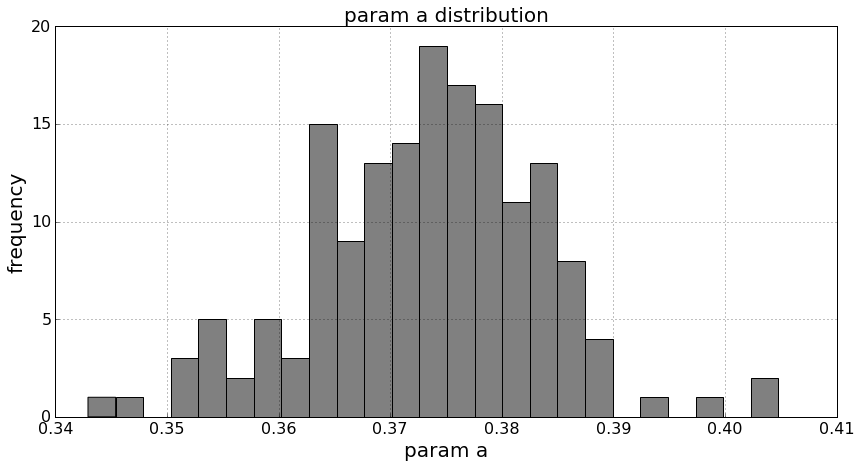

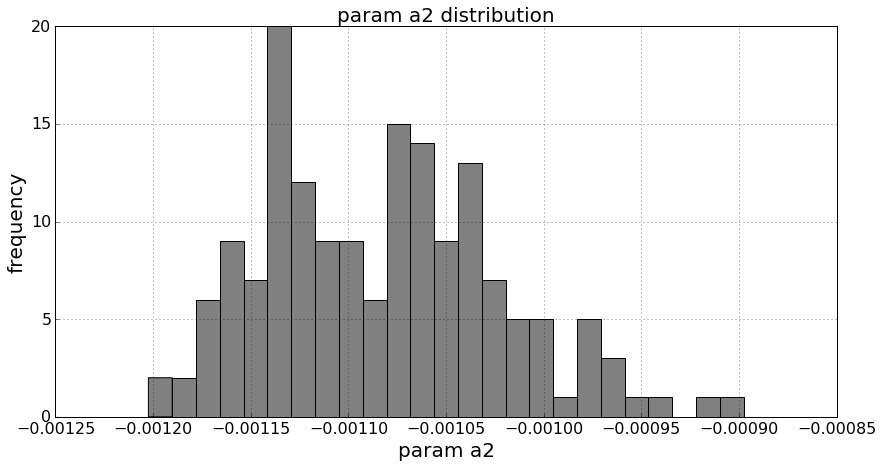

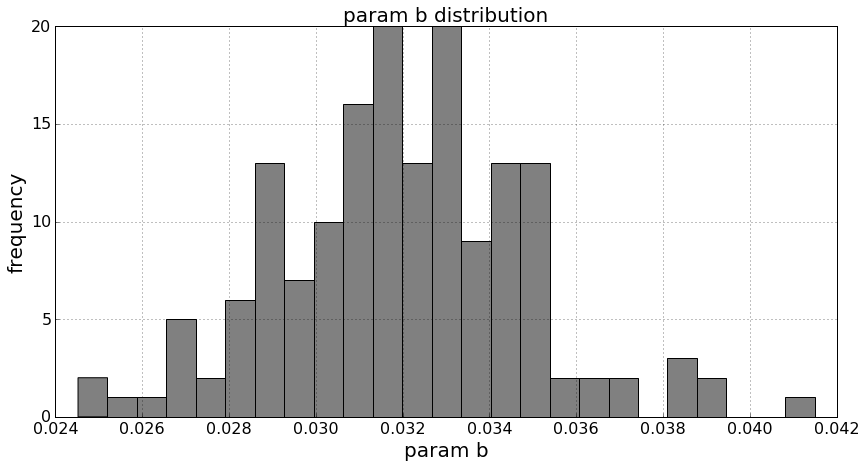

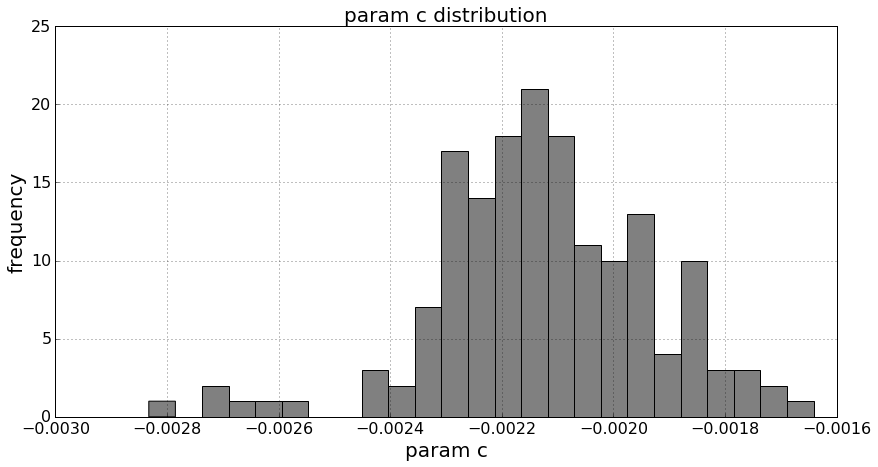

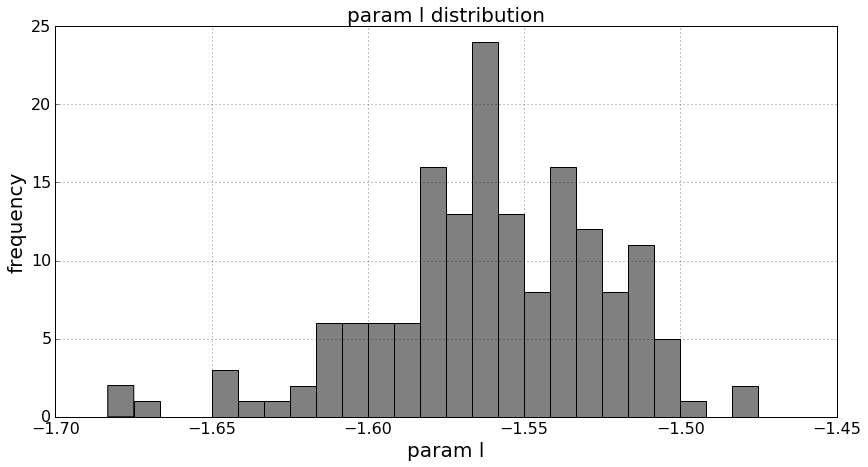

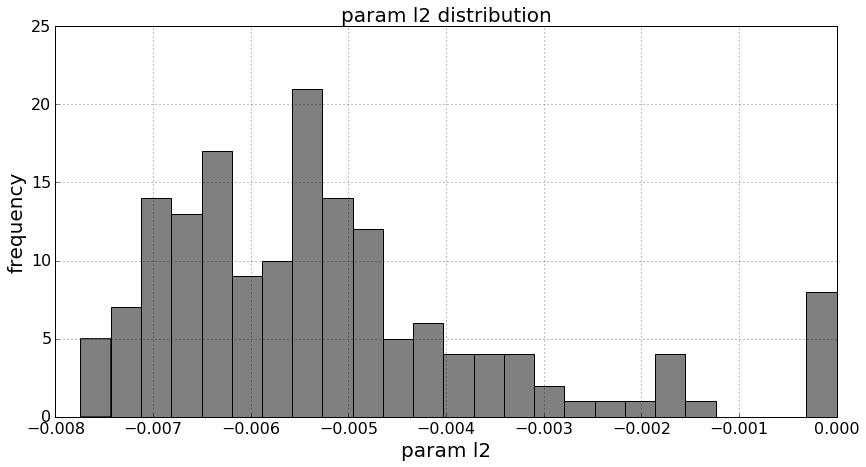

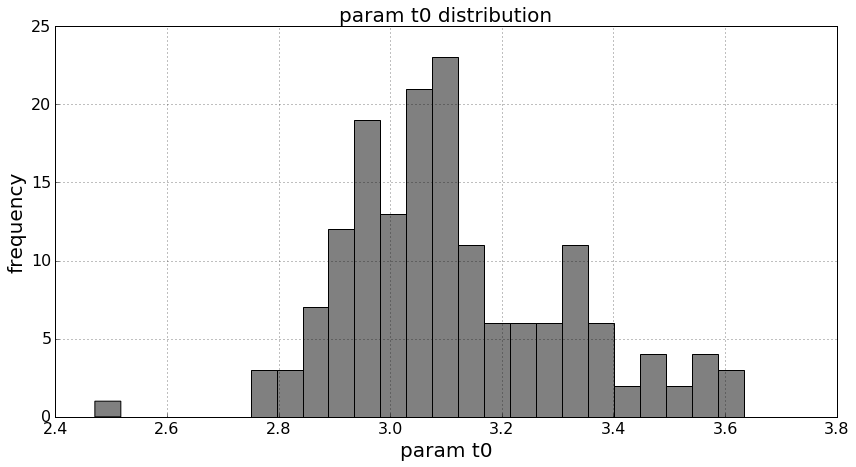

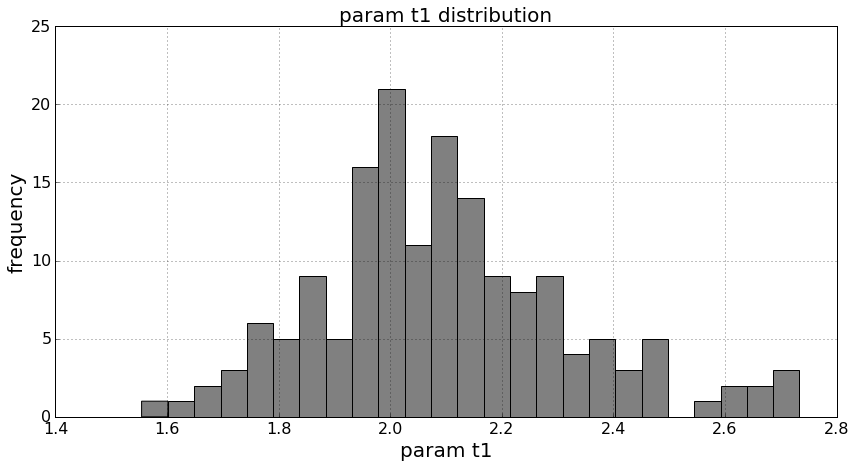

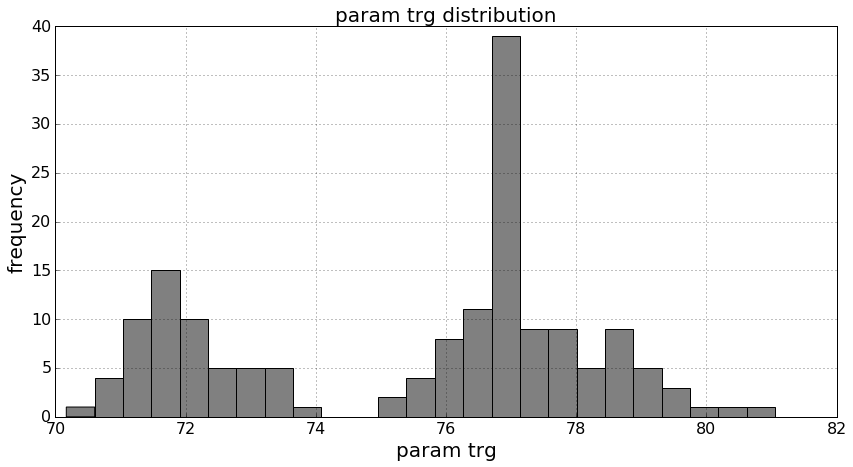

In [14]:
#Histogram for each engine parameter
#create a list with all the available engine parameters
paramsl = paramsDF.drop(paramsDF.columns[11], axis = 1)
paramlist = list(sorted(paramsl.columns.unique()))
for p in range(2,(len(paramlist))):
    tit = paramlist[p] + ' distribution'
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(tit,fontsize=20)
    plot = fig.add_subplot(111)
    # We change the fontsize of minor ticks label 
    plot.tick_params(axis='x', which='major', labelsize=16)
    plot.tick_params(axis='y', which='major', labelsize=16)
    par_hist = paramsDF[paramlist[p]].hist(bins=25, color='grey')
    par_hist.set_xlabel(paramlist[p],fontsize=20)
    par_hist.set_ylabel("frequency",fontsize=20)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    plt.show()

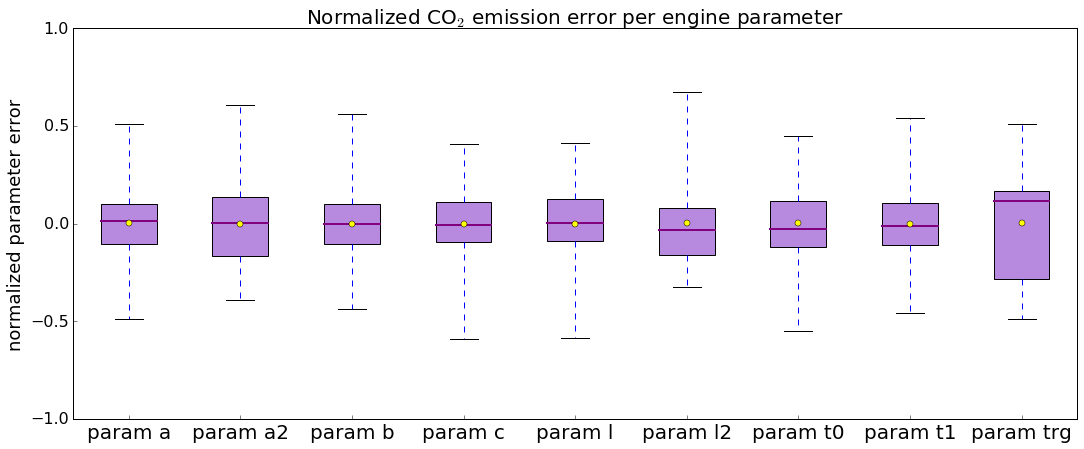

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [15]:
#Show normalized error boxplot for all engine parameters
paramsbp = paramsDF.drop(paramsDF.columns[[0,1,11]], axis = 1)
paramsbp_norm = (paramsbp - paramsbp.mean()) / (paramsbp.max() - paramsbp.min())
# Create a figure instance
fig = plt.figure(1, figsize=(18, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(paramsbp_norm.values, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
## Custom x-axis labels
ax.set_xticklabels(['param a', 'param a2', 'param b', 'param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('Normalized CO$_2$ emission error per engine parameter', fontsize=20)
plt.ylabel("normalized parameter error",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Correlation between all engine parameters and NEDC error. All vehicles

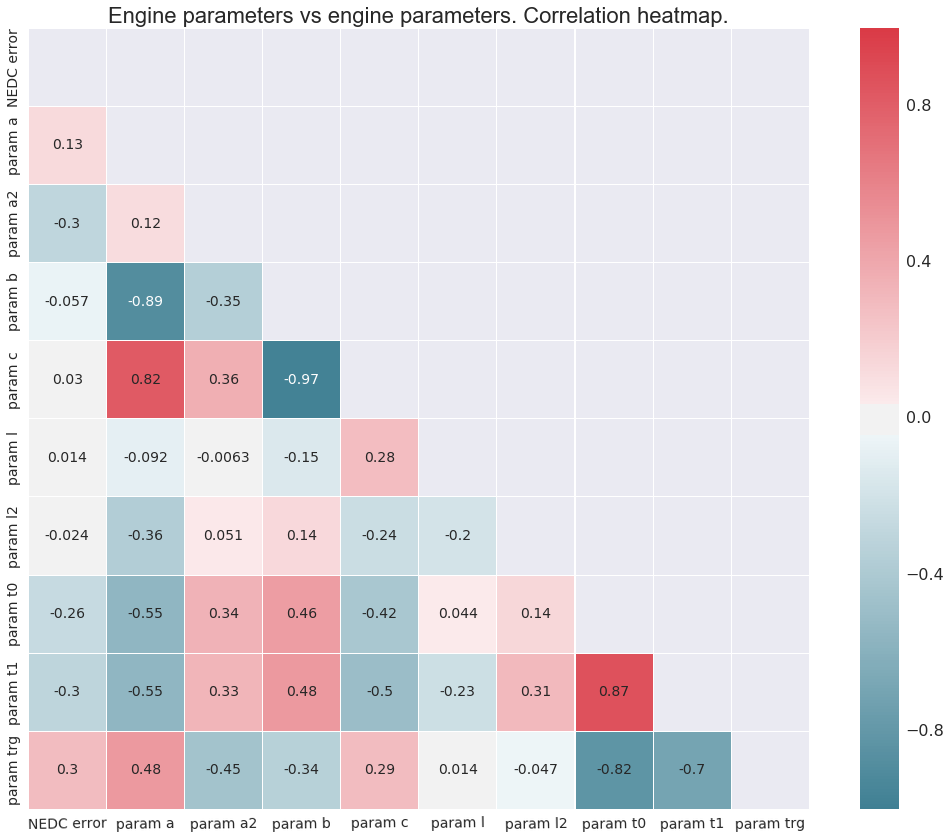

In [16]:
#Create a heatmap with the correlation of all the engine parameters and the NEDC error
paramNEDCerror = paramsDF.drop(['NEDC','target NEDC'], 1)
#from seaborn.apionly import heatmap, diverging_palette
import seaborn as sns
sns.set()
# Compute the correlation matrix
corr = paramNEDCerror.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0, linewidths=.1,  annot = True, annot_kws={"size":14}, square = True)
plt.title('Engine parameters vs engine parameters. Correlation heatmap.',fontsize=22)
plt.yticks(fontsize = 14) 
plt.xticks(fontsize = 14, rotation = 1)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
plt.show()

In [17]:
#Avoid using seaborn templates and go back to matplotlib templates
mpl.rcParams.update(inline_rc)

## Section 2. Performance of the model. Statistics per vehicle model and case test.

Glossary of vehicle models and number of test cases considered in the report

In [18]:
mod_cases_stats = valuesDF.groupby(['Model'],as_index=False).count() 
mod_cases_stats['Brand and model'] = ['Mercedes Sprinter']
cols = mod_cases_stats.columns.tolist()
cols = cols[-1:] + cols[:2]
mod_cases_stats = mod_cases_stats[cols]
mod_cases_stats

,Brand and model,Model,Case
0,Mercedes Sprinter,Sprinter,163


**NEDC**, **UDC**, and **EUDC** CO$_2$ emission error per vehicle model

Sprinter,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,4.98,11.53,1.22
Median,4.79,10.65,1.11
StdDev,2.11,4.41,2.05


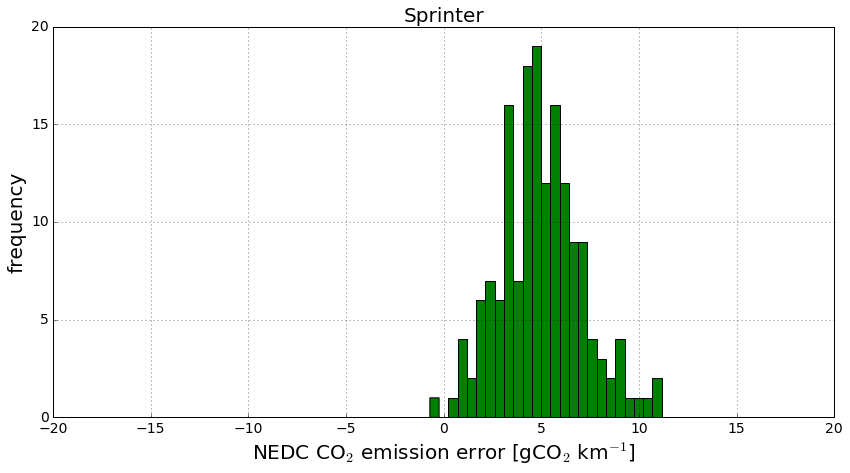

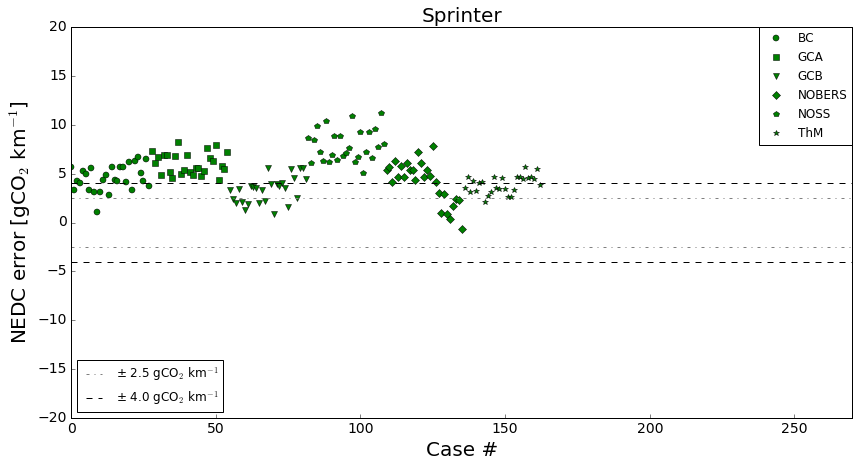

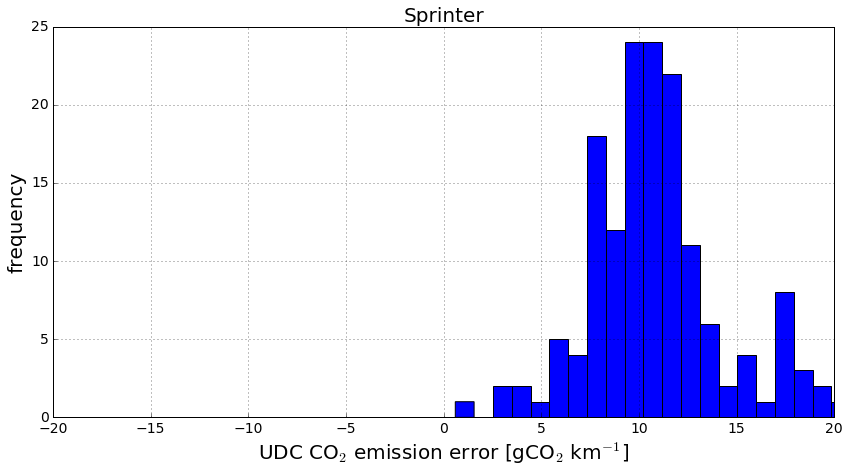

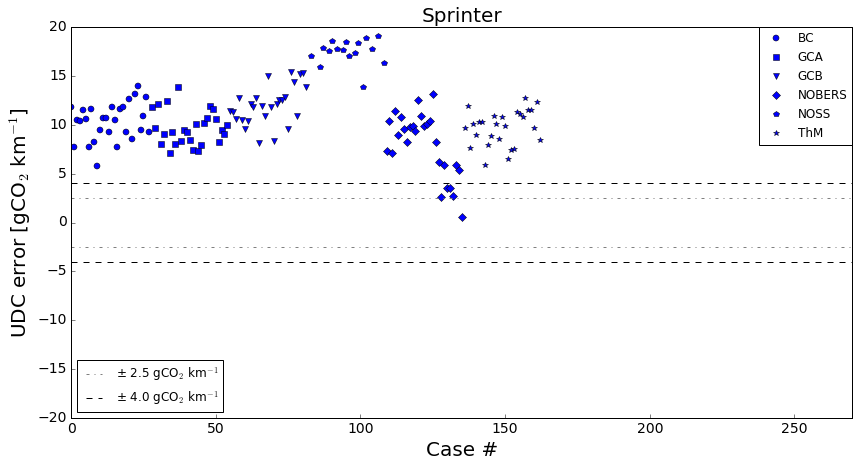

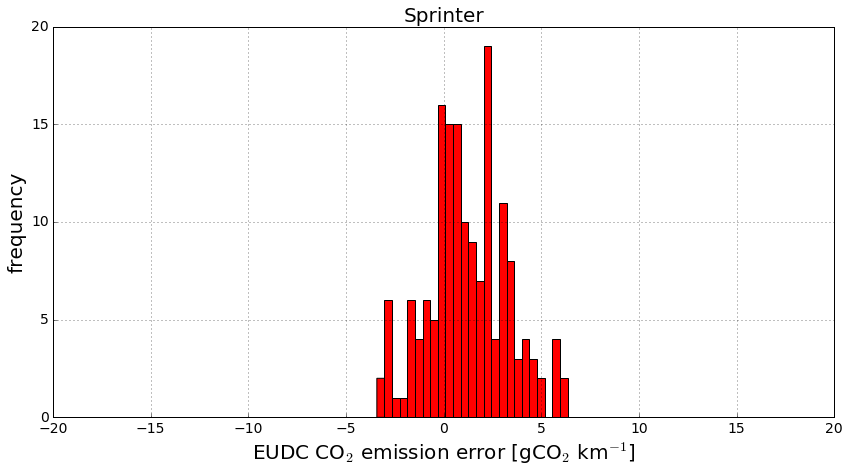

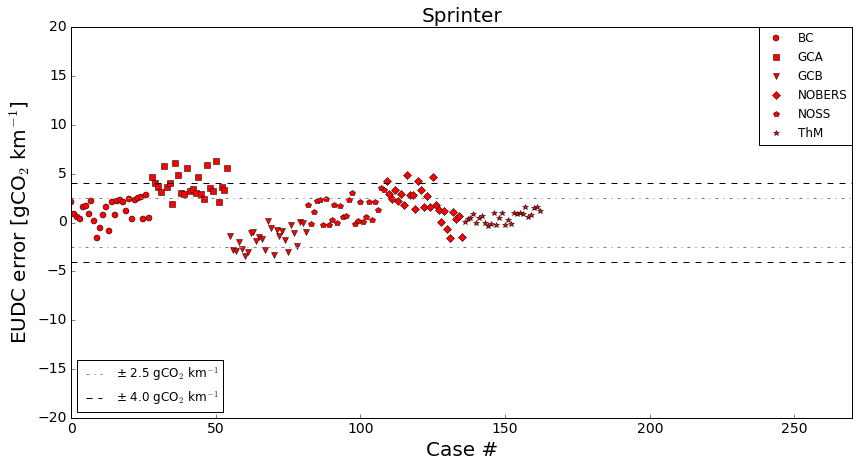

In [19]:
#In order to create statistic tables and plots for each model car, a numeric car ID 'cid' has to be assigned to each vehicle
tech = assign_technol_perCarAndCase(valuesDF)
Carlist = list(sorted(tech['Model'].unique()))
Cidlist = list(range(len(Carlist)))
tech.cid = tech['Model'].replace(Carlist, Cidlist, regex = True)
tech['cod'] = tech.cid
dictecnos = {'BC':'o', 'GCA':'s', 'GCB':'v', 'NOSS':'p','NOBERS':'D','VVL':'4','DI/MPI':'+','LB':'d','ThM':'*'}
#Create a table with the error statistics for each car model
for x in Carlist:
    Car = tech[tech['Model'] == x]
    grouped = Car.groupby('Tecno')
    CarDF = pd.DataFrame(index=['Averages','Median', 'StdDev'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
    CarDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.mean(),2)})
    CarDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.median(),2)})
    CarDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.std(),2)})
    CarDF.columns.name=Car.iat[0,3]
    display(CarDF)
    #plot the CO2 emission error histogram per vehicle model and cycle
    mydict = ([('NEDC', 0), ('UDC', 1), ('EUDC', 2)])
    mydict = collections.OrderedDict(mydict)
    for cycle in mydict:
        if cycle == 'NEDC':
            boxcolor = 'green'
        elif cycle == 'UDC':
            boxcolor = 'blue'
        else:
            boxcolor = 'red'
        fig = plt.figure(1, figsize=(14, 7))
        plt.title(Car.iat[0,3],fontsize=20)
        plot = fig.add_subplot(111)
        plot.tick_params(axis='x', which='major', labelsize=14)
        plot.tick_params(axis='y', which='major', labelsize=14)
        plot.set_xlim(-20, 20)
        plot.get_xaxis().tick_bottom()
        plot.get_yaxis().tick_left()
        car_hist = Car['d'+cycle].hist(bins=25, color=boxcolor)
        car_hist.set_xlabel(cycle+" CO$_2$ emission error [gCO$_2$ km$^{-1}$]",fontsize=20)
        car_hist.set_ylabel("frequency",fontsize=20)
        plt.show()
    #plot the emission error per case, model, and cycle
        fig = plt.figure(1, figsize=(14, 7))
        plt.title(Car.iat[0,3],fontsize=20)
        plot = fig.add_subplot(111)
        plot.tick_params(axis='x', which='major', labelsize=14)
        plot.tick_params(axis='y', which='major', labelsize=14)
        plot.set_xlim(0, 270)
        plot.set_ylim(-20,20)
        plot.get_xaxis().tick_bottom()
        plot.get_yaxis().tick_left()
        for key, group in grouped:
            plt.plot(group['Case'], group['d'+cycle], color=boxcolor, marker=dictecnos[key], label = key, linestyle='')
            first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
            plot.ax = plt.gca().add_artist(first_legend)
        plot.set_xlabel("Case #",fontsize=20)
        plot.set_ylabel(cycle+" error [gCO$_2$ km$^{-1}$]",fontsize=20)
        line1 = plot.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
        line2 = plot.axhline(y=2.5, color='grey', linestyle='-.')
        line3 = plot.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
        line4 = plot.axhline(y=4, color='black', linestyle='--')
        plt.legend(handles=[line1, line3], loc = 3)
        plt.show()

## NEDC error vs engine parameters per vehicle model

In [20]:
#Create a dataframe with the engine parameters, the model of the vehicle and the NEDC error
parCarDF = paramsDF
parCarDF['carmodel'] = model
groups = parCarDF.groupby('carmodel')

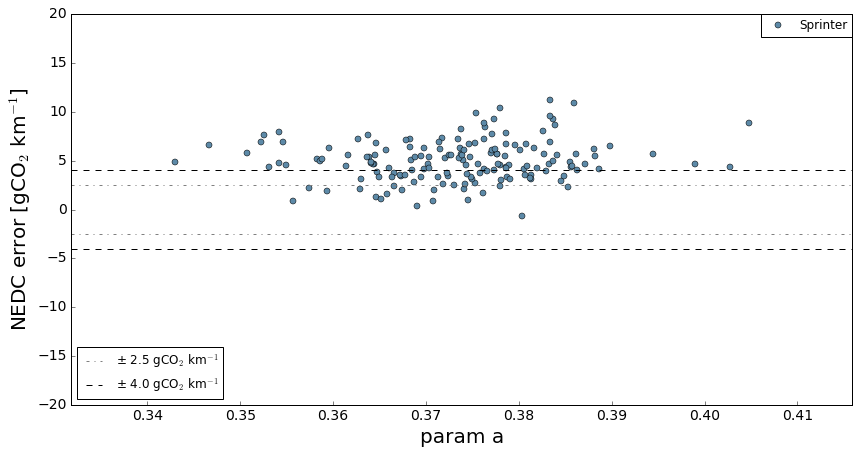

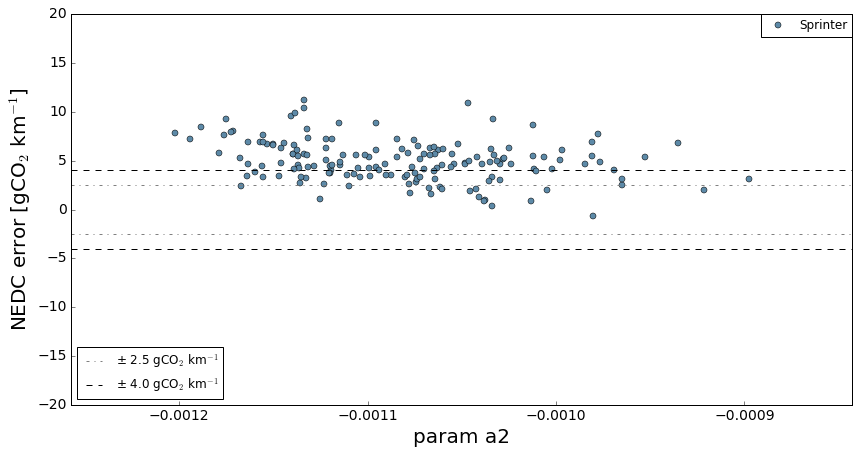

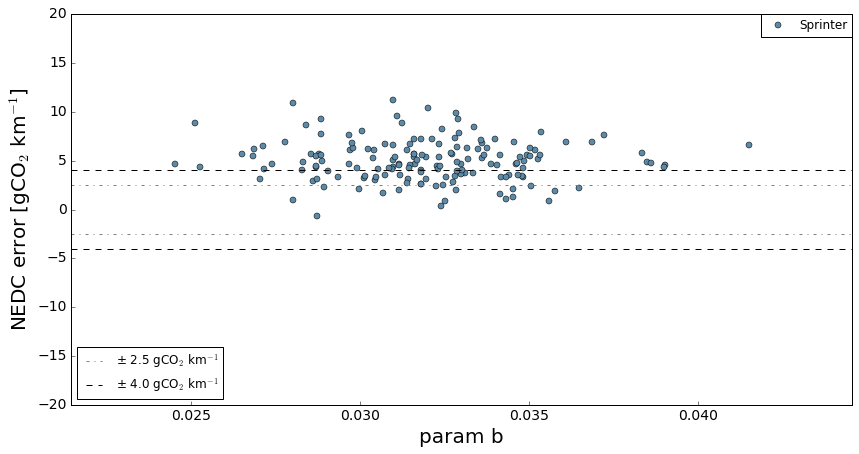

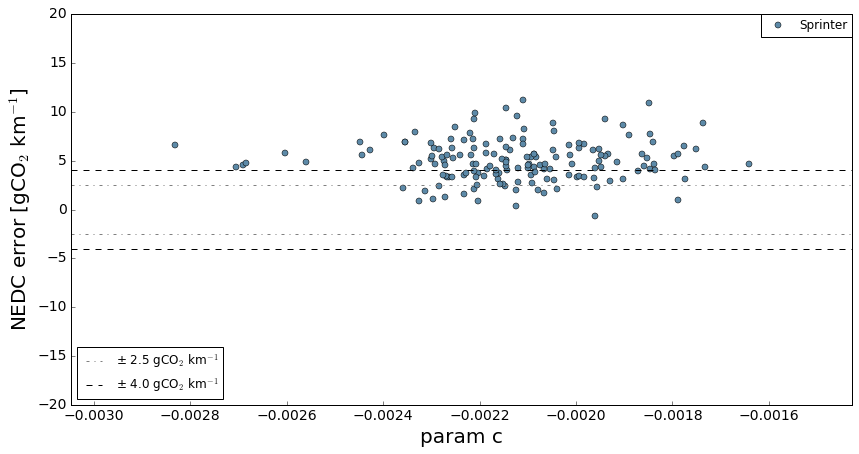

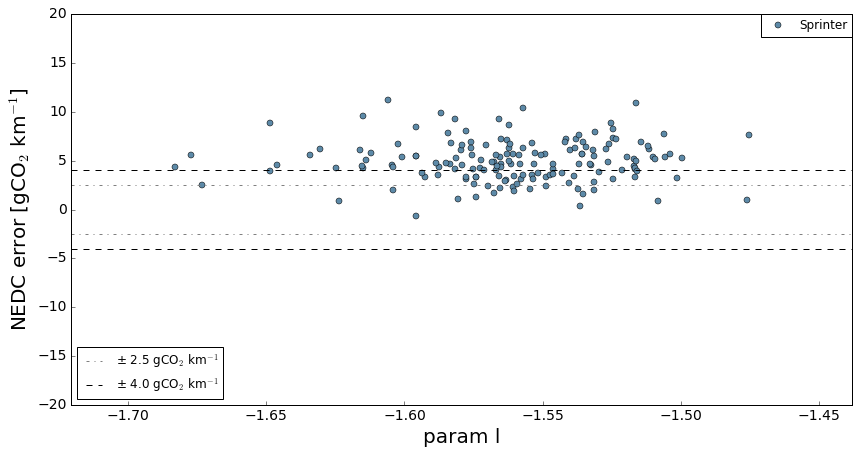

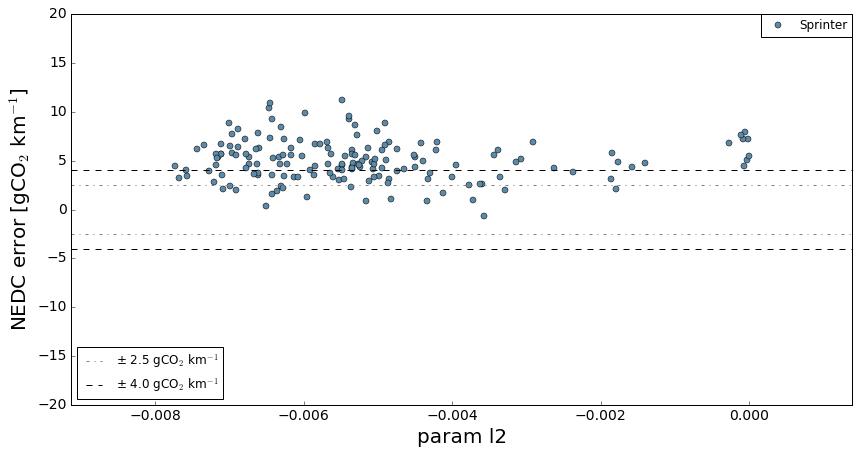

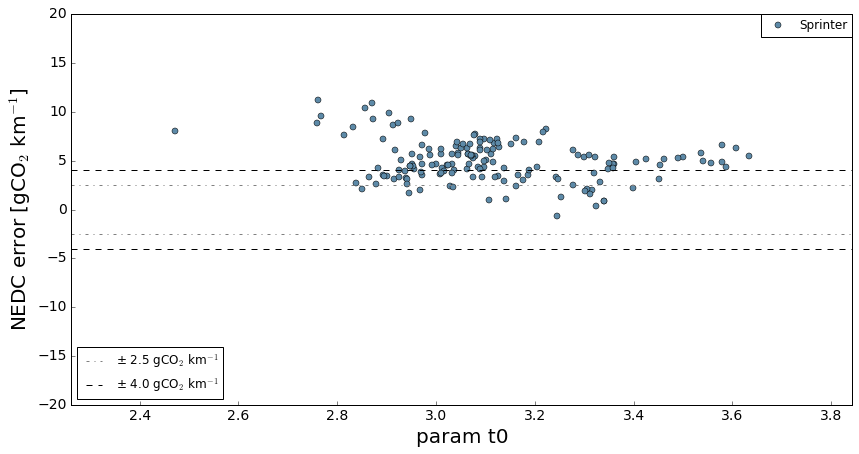

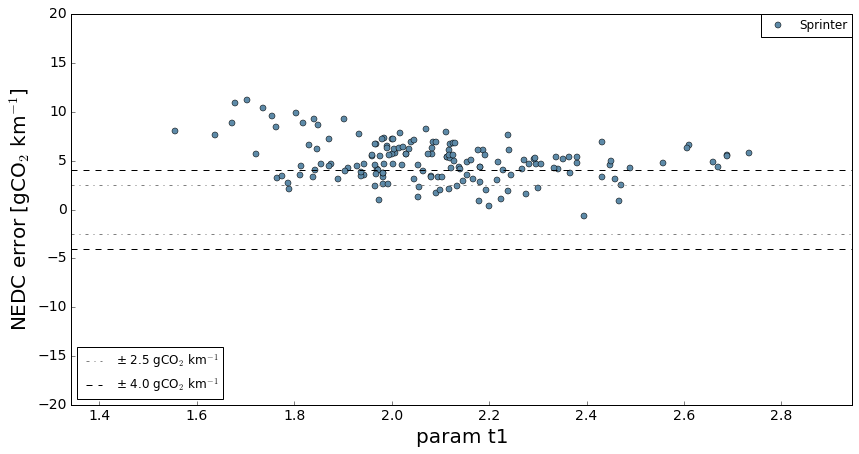

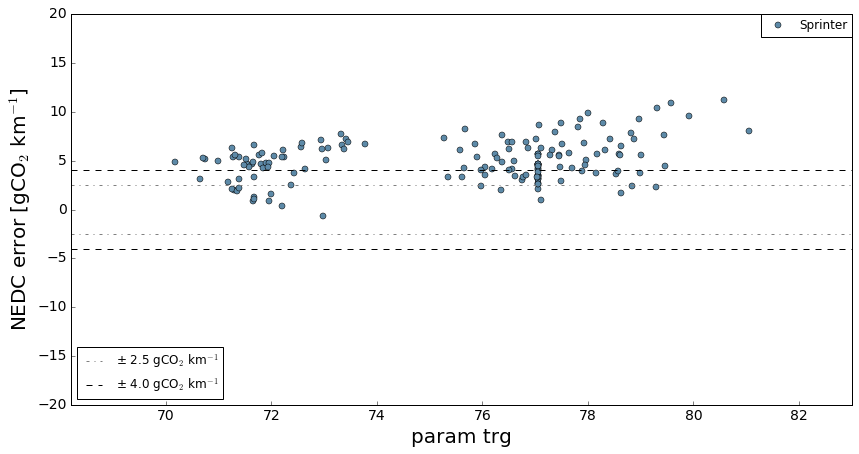

In [21]:
#Plotting the filtered NEDC error vs engine parameters for each vehicle model
for p in range(2,(len(paramlist))):
    fig = plt.figure(1, figsize=(14, 7))
    plot = fig.add_subplot(111)
    plot.margins(0.18)
    plot.set_prop_cycle(cycler('color', ['#5d8aa8','#e52b50','#ffbf00','#9966cc','#a4c639','#cd9575','#fbceb1','#00ffff','#b2beb5']))
    for name, group in groups:
        plt.plot(group[paramlist[p]], group['NEDC error'], marker='o', linestyle='', ms=6, label=name)
        plt.tick_params(axis='x', which='major', labelsize=14)
        plt.tick_params(axis='y', which='major', labelsize=14)
        plot.set_ylim(-20,20)
        plot.get_xaxis().tick_bottom()
        plot.get_yaxis().tick_left()
        first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
        plot.ax = plt.gca().add_artist(first_legend)
    plot.set_xlabel(paramlist[p],fontsize=20)
    plot.set_ylabel("NEDC error [gCO$_2$ km$^{-1}$]",fontsize=20)
    line1 = plt.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
    line2 = plt.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plt.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
    line4 = plt.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc=3)
    plt.show()    

Engine parameters vs engine parameters. Scatterplot per vehicle.

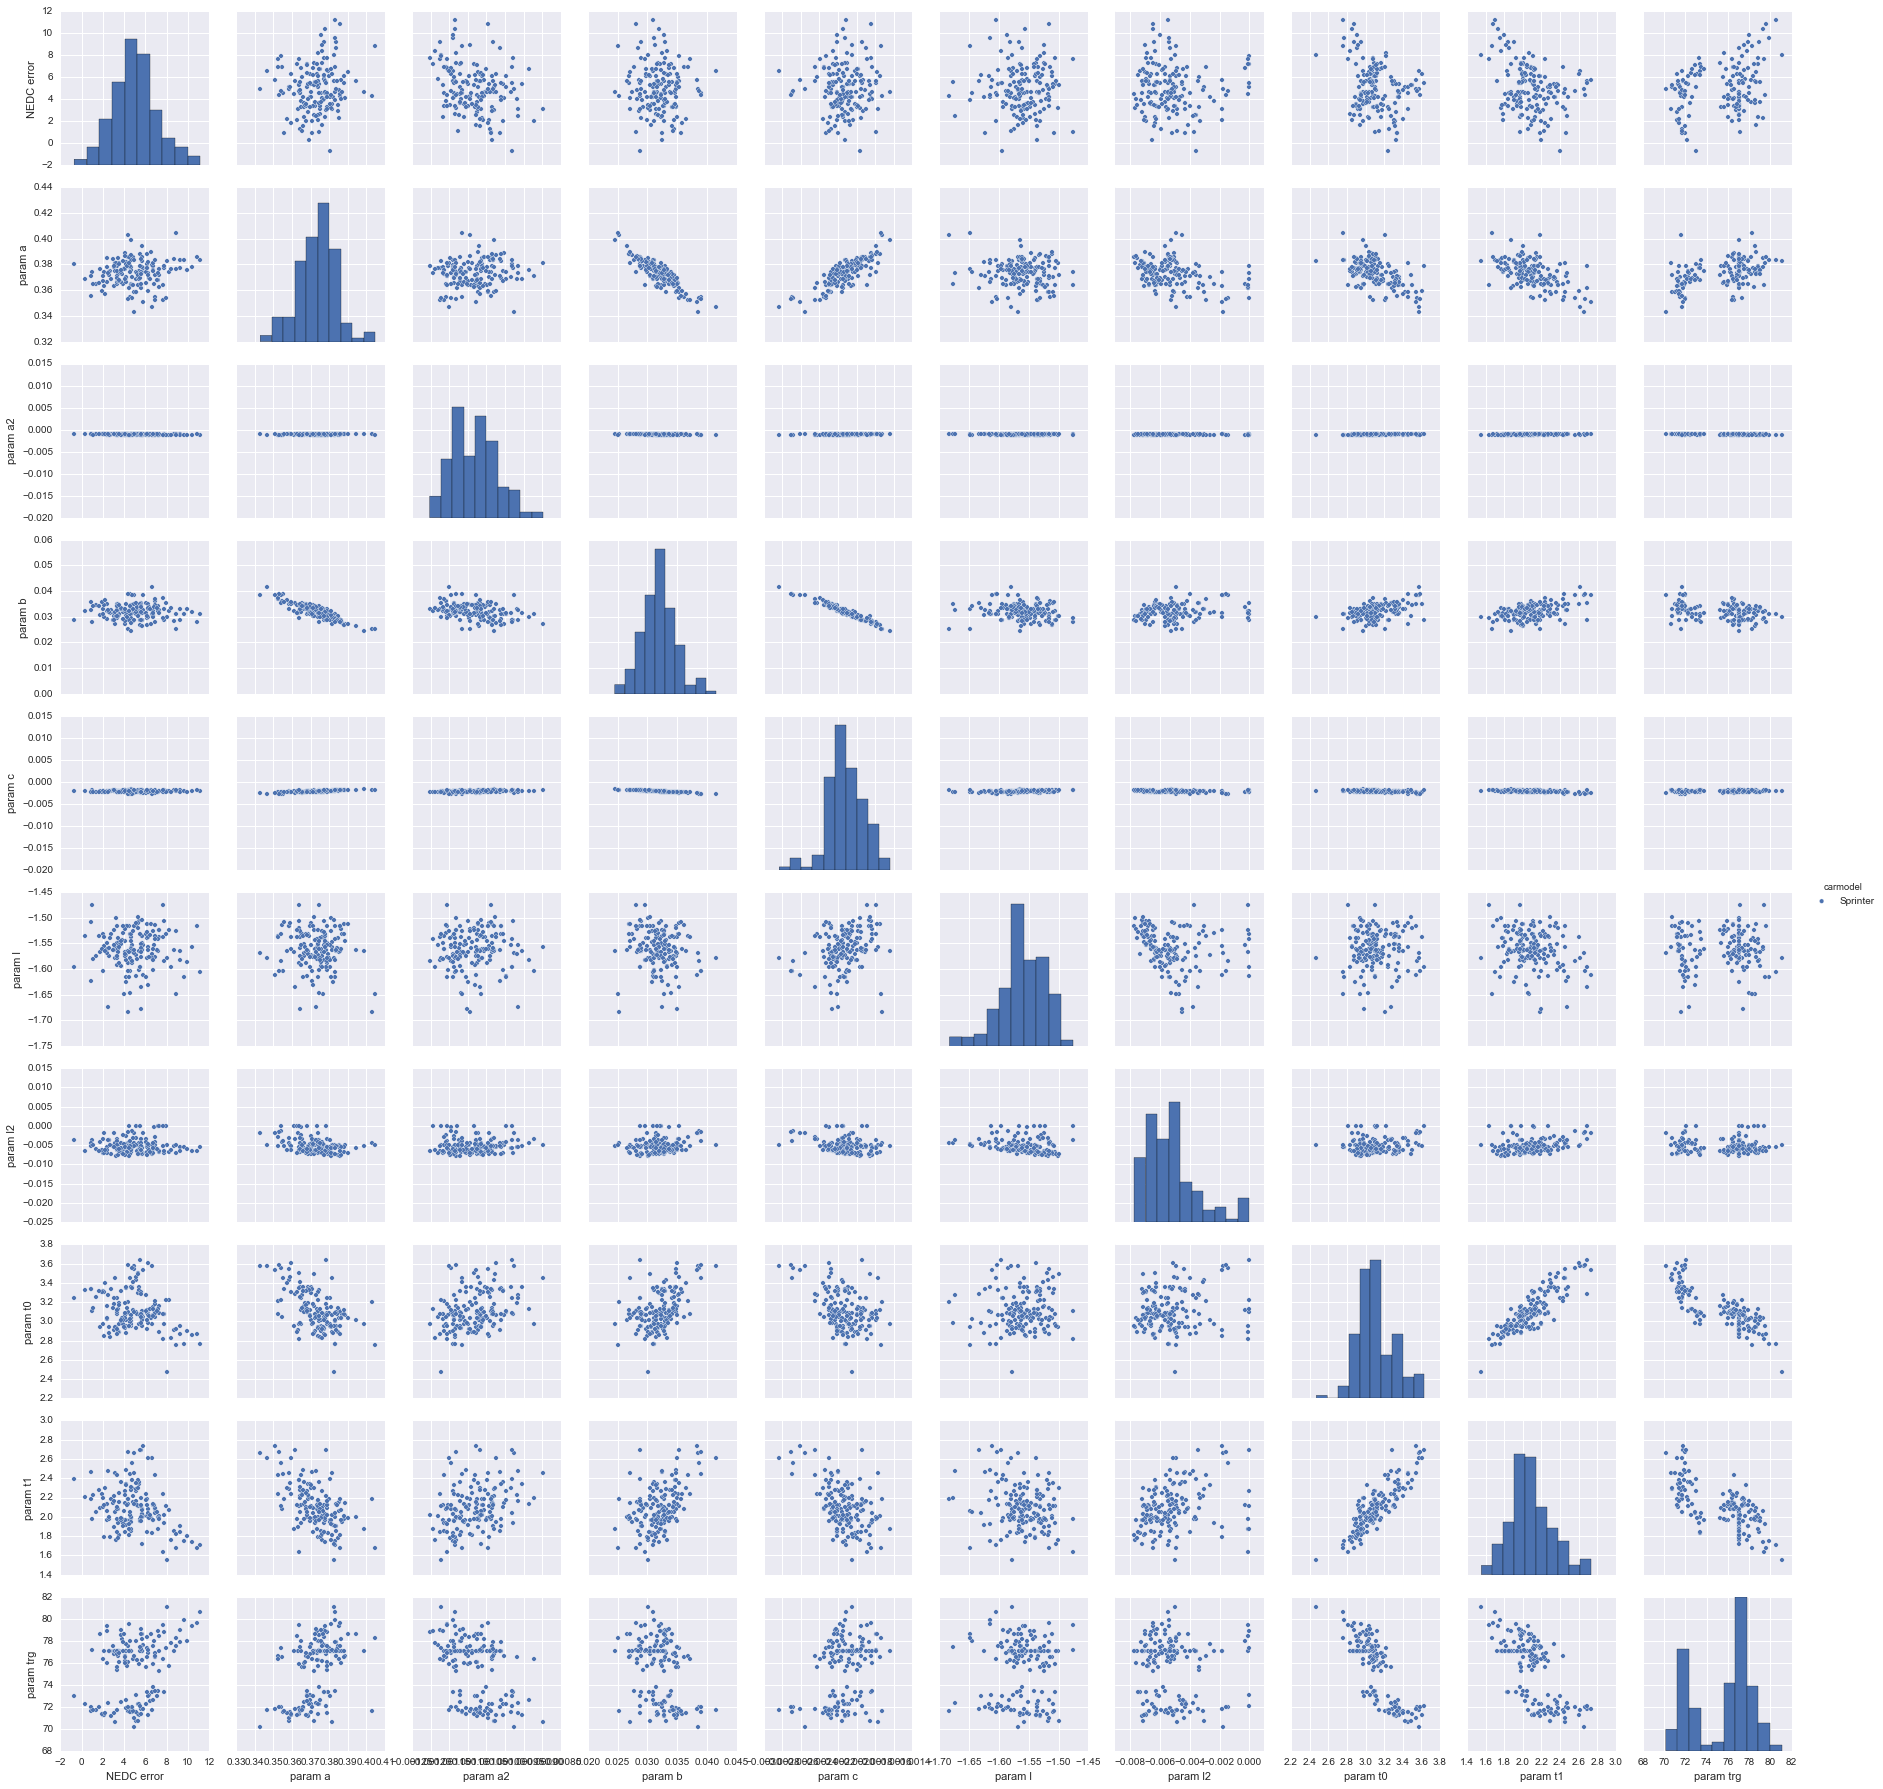

In [22]:
#plot engine parameters ones against the others and inform about vehicles models
import seaborn as sns
sns.set()
scatterDF = parCarDF.drop(['NEDC','target NEDC'], 1)
sns.pairplot(scatterDF, hue="carmodel")
plt.show()